# Epsilon Greedy
It's a [multi armed bandit](reinforcement/multi_armed_bandit.ipynb) algorithm. It chooses between exploiting the <i>best</i>(highest probability of reward) option found so far, or exploring other options. It explores with probability $\epsilon$, hence the name. 

In [1]:
## this code comes from the first reference mentioned below

import numpy as np

class EpsilonGreedy(object):
    def __init__(self,n_arms,epsilon_decay=50):
        self.counts = [0] * n  # example: number of views
        self.values = [0.] * n # example: number of clicks / views
        self.decay = epsilon_decay
        self.n = n_arms

    def choose_arm(self):
        """Choose an arm for testing"""
        epsilon = self.get_epsilon()
        if np.random.random() > epsilon:
            # Exploit (use best arm)
            return np.argmax(self.values)
        else:
            # Explore (test all arms)
            return np.random.randint(self.n)

    def update(self,arm,reward):
        """Update an arm with some reward value""" # Example: click = 1; no click = 0
        self.counts[arm] = self.counts[arm] + 1
        n = self.counts[arm]
        value = self.values[arm]
        # Running product
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[arm] = new_value

    def get_epsilon(self):
        """Produce epsilon"""
        total = np.sum(arm_counts)
        return float(self.decay) / (total + float(self.decay))

This is how `epsilon` changes over time

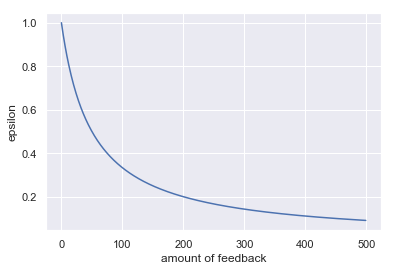

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.DataFrame({'x':range(0,500)})
df["x"] = df["x"].apply(lambda x: 50. / (x + 50.))
plt.plot(df); plt.ylabel("epsilon"); plt.xlabel("amount of feedback");

### Resources:
* [Y Hat — The beer bandit](http://blog.yhat.com/posts/the-beer-bandit.html)